In this lab, i will contrast regression and classification 
* explore the sigmoid function (also known as the logistic function)
* explore logistic regression; which uses the sigmoid function

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [ ]:
# Generate an array of evenly spaced values between -10 and 10
z_tmp = np.arange(-10,11)

# Use the function implemented above to get the sigmoid values
y = sigmoid(z_tmp)

# Code for pretty printing the two arrays next to each other
np.set_printoptions(precision=3)
print("input(z), output(sigmoid(z))")
print(np.c_[z_tmp, y])


Text(0.5, 0, 'z')

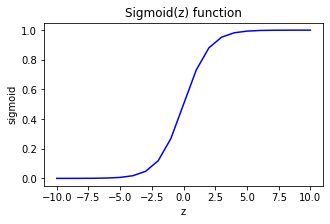

In [25]:
# Plot z vs sigmoid(z)
fig, ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z_tmp, y, c="b")
ax.set_title('Sigmoid(z) function')
ax.set_ylabel('sigmoid')
ax.set_xlabel('z')

In [7]:
x_train = np.array([0,1,2,3,4,5])
y_train = np.array([0,0,0,1,1,1])

w_in = np.zeros((1))
b_in = 0

# *Logistic Regression, Decision Boundary*

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset

Let's suppose you have following training dataset
- The input variable `X` is a numpy array which has 6 training examples, each with two features
- The output variable `y` is also a numpy array with 6 examples, and `y` is either `0` or `1`

In [13]:
X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1]).reshape(-1,1) 

Text(0.5, 0, 'z')

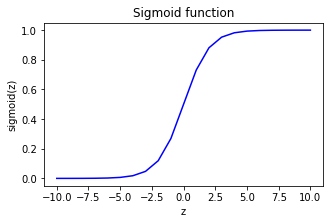

In [26]:
# Plot sigmoid(z) over a range of values from -10 to 10
z = np.arange(-10,11)

fig,ax = plt.subplots(1,1,figsize=(5,3))
# Plot z vs sigmoid(z)
ax.plot(z, sigmoid(z), c="b")

ax.set_title("Sigmoid function")
ax.set_ylabel('sigmoid(z)')
ax.set_xlabel('z')

# Cost Function for Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt


For **Linear** Regression we have used the **squared error cost function**:
The equation for the squared error cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$

  This cost function worked well for linear regression, it is natural to consider it for logistic regression as well. However, as the slide above points out, $f_{wb}(x)$ now has a non-linear component

In [6]:
X_train =np.array([[0.5,1.5],[1,1],[1.5,0.5],[3,0.5],[2,2],[1,2.5]]) #(m,n)
y_train = np.array([0,0,0,1,1,1])                                    #(m,)

**Cost function**

 for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:

In [17]:
def compute_cost_logistic(X, y, w, b):
  """
  Computes cost

  Args:
    X (ndarray (m,n)): Data, m examples with n features
    y (ndarray (m,)) : target values
    w (ndarray (n,)) : model parameters  
    b (scalar)       : model parameter
    
    cost (scalar): cost
  """
  m = X.shape[0]
  cost = 0.0

  for i in range(m):
    z_i = np.dot(X[i],w) + b
    f_wb_i = sigmoid(z_i)
    cost +=  -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)

  cost = cost / m
  return cost 


In [19]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


# Gradient Descent for Logistic Regression

*Goals*

* update gradient descent for logistic regression.
* explore gradient descent on a familiar data set

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g

In [3]:
#DATA SET
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [4]:
def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  

In [5]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]


*Gradient Descent Code*

In [6]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters): 
    """
    Performs batch gradient descent
    
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db      
    return w,b 

In [7]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")


updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


*Logistic Regression using Scikit-Learn*

In [8]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

Fit the model

In [9]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X,y)

LogisticRegression()

Make Predictions
* You can see the predictions made by this model by calling the `predict` function

In [10]:
y_pred = lr_model.predict(X)

print("Prediction on training set: ", y_pred)

Prediction on training set:  [0 0 0 1 1 1]


Calculate accuaracy
* You can calculate this accuaracy of this model by calling `score` function.

In [11]:
print("Accuaracy on training set: ", lr_model.score(X,y))

Accuaracy on training set:  1.0
